In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Define the geometry of foundation
L=2.5 # Length of foundation in m
B=2.5 # Width of foundation in m

# Discretize the foundation
Nx=10 # Number of elements along x
Ny=10 # Number of elements along y

dx=L/Nx # Length of element along x
dy=B/Ny # Length of element along y

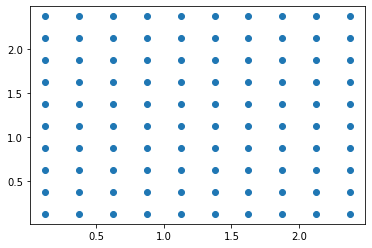

In [17]:
# Define coordinates of discretized point loads

N_grids=Nx*Ny # Total number of grids

# Define the coordinates of the point loads
coordinates=np.zeros((N_grids,2))

for i in range(Nx):
    for j in range(Ny):
        coordinates[i*Ny+j,0]=i*dx+dx/2
        coordinates[i*Ny+j,1]=j*dy+dy/2

# Plot the grid points
plt.scatter(coordinates[:,0],coordinates[:,1])

In [18]:
# Function to calculate increment of stress at point
def stress_increment(x,y,x0,y0, z0, Q):
    # Calculate the distance between the point and the load
    r=np.sqrt((x-x0)**2+(y-y0)**2)
    # Calculate the increment of stress
    I= 3/(2*np.pi*z0**2*(1+(r/z0)**2)**2.5 )

    return I

#Test
stress_increment(0,0,0,0,2,100)

0.1193662073189215

In [19]:
# Compute the stress increment at each grid point
Q=100 # Load intensity in kN
q=Q/(L*B) # Load intensity in kN/m2
z0=2 # Depth of load in m

Is=np.zeros(N_grids)
Is=stress_increment(coordinates[:,0],coordinates[:,1],1.25,1.25,z0,Q)

# Sum all influence factors I
I=Is.sum()
dSigma=I*q*dy*dx

#print result with two decimal places
print('The increment of stress at the point is %.2f kPa' %dSigma)


The increment of stress at the point is 7.21 kPa


In [22]:
# Now loop over different discretizations to plot stress vs number of elements
N_elements=np.arange(1,21)
stress=np.zeros(len(N_elements))

for i in range(len(N_elements)):
    Nx=N_elements[i]
    Ny=N_elements[i]
    dx=L/Nx
    dy=B/Ny

    N_grids=Nx*Ny
    coordinates=np.zeros((N_grids,2))

    for i in range(Nx):
        for j in range(Ny):
            coordinates[i*Ny+j,0]=i*dx+dx/2
            coordinates[i*Ny+j,1]=j*dy+dy/2

    Is=stress_increment(coordinates[:,0],coordinates[:,1],1.25,1.25,z0,Q)
    I=Is.sum()
    stress[i]=I*q*dy*dx



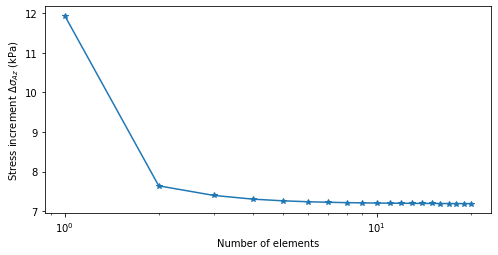

In [32]:
plt.plot(N_elements,stress, '*-')
# Add labels
plt.xlabel('Number of elements')
plt.ylabel(r'Stress increment $\Delta \sigma_{Az}$ (kPa)')

# Make y scale logarithmic
plt.xscale('log')


# Size the figure as 4 in wide by 2 in tall
plt.gcf().set_size_inches(8, 3.8)

# Save the figure as svg
plt.savefig('stress_increment.svg', format='svg')

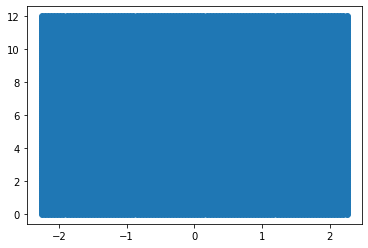

In [99]:
# Now plot stress increments at different depths and positions. Make the coordinate of the midpoint of the footing the origin

# Define the coordinates of underground points i.e. (x, z) x=0 is midpoint of footing
B=1.5 # Width of footing
L=10*B # Length of footing

D= 8*B # Depth of profile
LS= 3*B # Length of profile

Nz=100 # Number of elements along z
Nx=100 # Number of elements along x

dz=D/Nz # Length of element along z
dx=LS/Nx # Length of element along x

# Define coordinates of grid points
N_grids=(Nz+1)*(Nx+1) # Total number of grids points
coordinates=np.zeros((N_grids,2))
StressInc_vector=np.zeros(N_grids)

# Plot the grid points

for i in range(Nx+1):
    for j in range(Nz+1):
        coordinates[i*(Nz+1)+j,0]=(i*dx)-0.5*LS
        coordinates[i*(Nz+1)+j,1]=(j*dz)

plt.scatter(coordinates[:,0],coordinates[:,1])

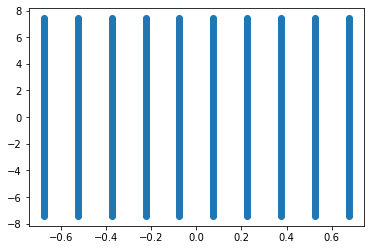

In [100]:
# Discretize foundation into elements and calculate stress increment at each grid point

Nxx=10 # Number of elements along x
Nyy=100 # Number of elements along y

dxx=B/Nxx # Length of element along x
dyy=L/Nyy # Length of element along y

# Define the coordinates of the point loads
coordinates_foundation=np.zeros((Nxx*Nyy,2))

for i in range(Nxx):
    for j in range(Nyy):
        coordinates_foundation[i*Nyy+j,0]=(i*dxx+dxx/2)-B/2
        coordinates_foundation[i*Nyy+j,1]=(j*dyy+dyy/2)-L/2

# Plot the grid points
plt.scatter(coordinates_foundation[:,0],coordinates_foundation[:,1])

C:\Users\zamcr\AppData\Local\Temp/ipykernel_25884/1707980348.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  I= 3/(2*np.pi*z0**2*(1+(r/z0)**2)**2.5 )
C:\Users\zamcr\AppData\Local\Temp/ipykernel_25884/1707980348.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  I= 3/(2*np.pi*z0**2*(1+(r/z0)**2)**2.5 )


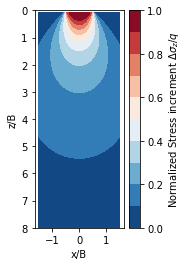

In [101]:
# Calculate the increment of stress at each grid point in the soil profile
StressInc_vector=np.zeros(N_grids)
for i in range(N_grids):
    x0=coordinates[i,0]
    z0=coordinates[i,1]
    y0=0
    for j in range(Nxx*Nyy):
        x=coordinates_foundation[j,0]
        y=coordinates_foundation[j,1]
        Is=stress_increment(x,y,x0,y0,z0,Q)
        StressInc_vector[i]+=Is
    StressInc_vector[i]=StressInc_vector[i]*q*dxx*dyy
    

# Make a contour plot of the stress increment
X=coordinates[:,0].reshape((Nx+1,Nz+1))/B
Z=coordinates[:,1].reshape((Nx+1,Nz+1))/B
StressInc=StressInc_vector.reshape((Nx+1,Nz+1))/q



# Add more color levels
plt.contourf(X,Z,StressInc, levels=10, cmap='RdBu_r')
# invert the y axis
plt.gca().invert_yaxis()
plt.colorbar(label=r'Normalized Stress increment $\Delta \sigma_{z}/q$')
plt.xlabel('x/B')
plt.ylabel('z/B')

# Scale x and y axis equally
plt.axis('equal')

# Size the figure as 1 in wide by 2 in tall
plt.gcf().set_size_inches(2, 4)

# Save the figure as svg
plt.savefig('stress_increment_profile.svg', format='svg')